# **Bagian 1 : Convolutional Neural Network**
Pada praktikum kali ini, kita akan menggunakan Google Colaboratory sebagai Web-based Integrated Development Environment (IDE). Google Colab : https://colab.research.google.com.
Dataset yang akan digunakan pada praktikum kali ini yaitu CIFAR-10.

 Dataset CIFAR-10 adalah dataset yang biasa digunakan untuk object recognition, yang terdiri dari 80 juta gambar berukuran kecil, serta 60,000 32x32 Gambar berwarana dengan 6000 gambar per class dan terdiri dari 10 class.CIFAR-10 ditemukan dan dikumpulkan oleh Alex Krizhevsky, Vinod Nair, dan Geoffrey Hinton.



# I. Deep Learning
Deep learning Deep Learning adalah bagian dari kecerdasan buatan dan machine learning (dapat dilihat pada gambar 2), yang merupakan pengembangan dari neural network multiple layer untuk memberikan ketepatan tugas seperti deteksi objek, pengenalan suara, terjemahan bahasa dan lain – lain.

# II. Convolutional Neural Network
Convolutional Neural Network adalah salah satu metode machine learning dari pengembangan Multi Layer Perceptron (MLP) yang didesain untuk mengolah data dua dimensi. CNN termasuk dalam jenis Deep Neural Network karena dalamnya tingkat jaringan dan banyak diimplementasikan dalam data citra.

# Import Module

Langkah pertama yang harus dilakukan yakni melakukan import Module yang akan digunakan, yakni tensorflow,keras, numpy, dan matplotlib.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

## Load cifar10 dataset

Setelah berhasil melakukan import library yang dibutuhkan, kita akan mengimpor dataset CIFAR-10

In [2]:
cifar = datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Define the class

Ketika data sudah berhasil diimpor, kita perlu untuk memodelkan class yang akan digunakan dalam dataset CIFAR-10. Yang terdiri dari
airplane,automobile,bird,cat,deer,dog,frog,horse,ship, dan truck.


In [3]:
num_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Sample data dari dataset tersebut, dapat dilihat sebagai berikut :

<ipython-input-4-cda862f44988>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(train_labels[i])])


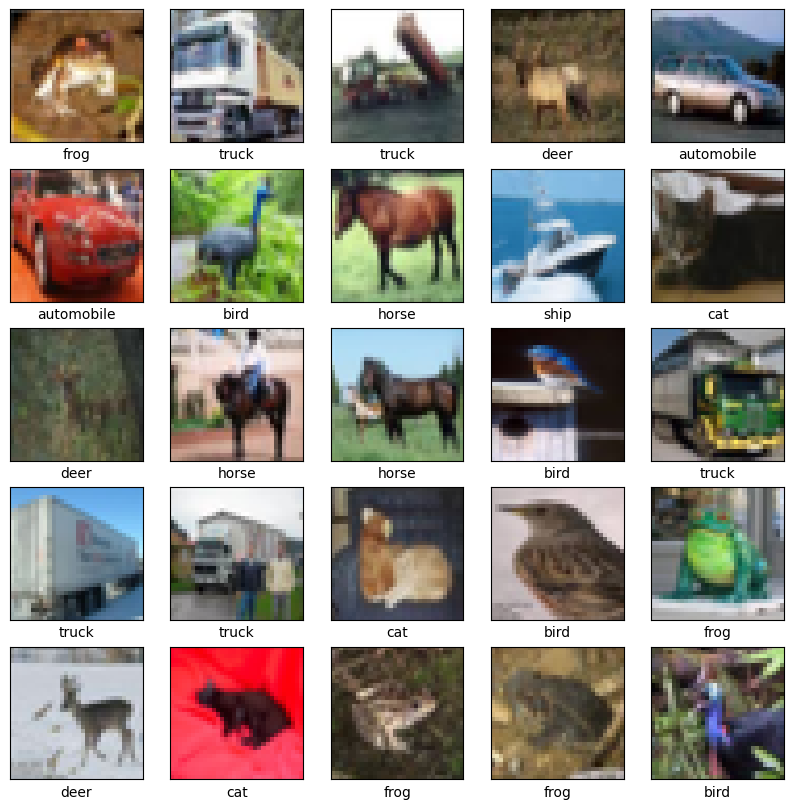

In [4]:
# View sample data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

# Data Exploration

In [5]:
# Show data shape
train_images.shape

(50000, 32, 32, 3)

50000 image, ukuran 32x32 pixel



#####Dapat dilihat bahwa terdapat output (50000,32,32,3) ketika melihat data shape.
#####Yang berarti terdapat sebanyak 50.000 training images, yang berukuran 32x32 pixel.

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
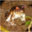

In [6]:
train_images[0]

In [7]:
train_labels[0]

array([6], dtype=uint8)

array([6], dtype=uint8) artinya syntax untuk membuat sebuah array NumPy dengan satu elemen, yaitu angka 6. Array ini memiliki tipe data uint8, yang merupakan tipe data integer unsigned berukuran 8 bit.

Artinya, array ini dapat menyimpan angka antara 0 dan 255. Angka 6 dalam array ini akan disimpan sebagai nilai 6 dalam memori komputer.

Gambar-gambar tersebut akan memiliki label berbentuk array dengan tipe integer, yang range nya 0-9 yang merepresentasikan 10 kelas yang sudah ditentukan (airplane,automobile,bird,cat,deer,dog,frog,horse,ship, dan truck).

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Syntax tersebut digunakan untuk pemrosesan gambar dan machine learning untuk menormalisasi nilai piksel gambar.

Dan kegunaan dari code line train_images / 255.0 dan test_images / 255.0 adalah untuk mengubah value menjadi range 0-1 sebelum diberikan ke model neural network.


# Build the Model

## Define the Model

Convolutional Neural Network digunakan sebagai metode untuk melatih kumpulan dataset dalam hal-ini CIFAR-10 dengan parameter tersedia, dan mengambil bentuk gambar 2D sebagai masukan-nya, lalu menggabungkannya dengan filter untuk menghasilkan keluaran yang diinginkan.

Model yang digunakan adalah sequential model, keras Conv2D merupakan layer konvolusi 2D yang membuat convolution kernel yang nantinya akan membantu dalam menghasilkan output. Proses konvolusi memanfaatkan filter yang memiliki ukuruan tinggi,lebar, dan tebal tertentu dan beriterasi dengan beberapa filter berbeda hingga menghasilkan gambar yang diinginkan.

Dalam code tersebut, kita menggunakan total 32 filter, dan menggunakan MaxPooling  untuk mengurangi kadar spatial dimension dari output volume.

Adam Optimizer digunakan karena optimizer tersebut sudah terbukti menjadi optimizer terbaik untuk klasifikasi gambar dalam beberapa studi yang telah dilakukan.
(source : https://www.mdpi.com/2313-433X/6/9/92 )


In [9]:
#Define the model
model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))


model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          81,930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,826 (323.54 KB)

 Trainable params: 82,826 (323.54 KB)

 Non-trainable params: 0 (0.00 B)

prams = parameter

dense = desnsity



## Fiting Model

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4110 - loss: 1.6619
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5700 - loss: 1.2371
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.6115 - loss: 1.1237
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.6320 - loss: 1.0664
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.6500 - loss: 1.0152
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6581 - loss: 0.9802
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.6663 - loss: 0.9675
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.6798 - loss: 0.9217
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.6819 - loss: 0.9203
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6841 - loss: 0.9087


Ketika melakukan fitting model dengan jumlah epochs=10 , jumlah epoch adalah hyperparameter yang menentukan berapa kali algoritma pembelajaran akan bekerja mengolah seluruh dataset training. Satu epoch berarti bahwa setiap sampel dalam dataset training memiliki kesempatan untuk memperbarui parameter model internal.
Dengan nilai epoch tersebut, didapatkan tingkat loss 0.9358 dan akurasi sebesar 0.6747

## Testing Model

In [13]:
 test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - 8ms/step - accuracy: 0.6434 - loss: 1.0404

Test accuracy: 0.6434000134468079


Didapatkan nilai tes akurasi sebesar 64,4..%.	not bad aman

## Image Predict

sekarang memprediksi model untuk gambar

In [14]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, int(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

<ipython-input-15-b9a88c911035>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_names[int(true_label)]),
<ipython-input-15-b9a88c911035>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


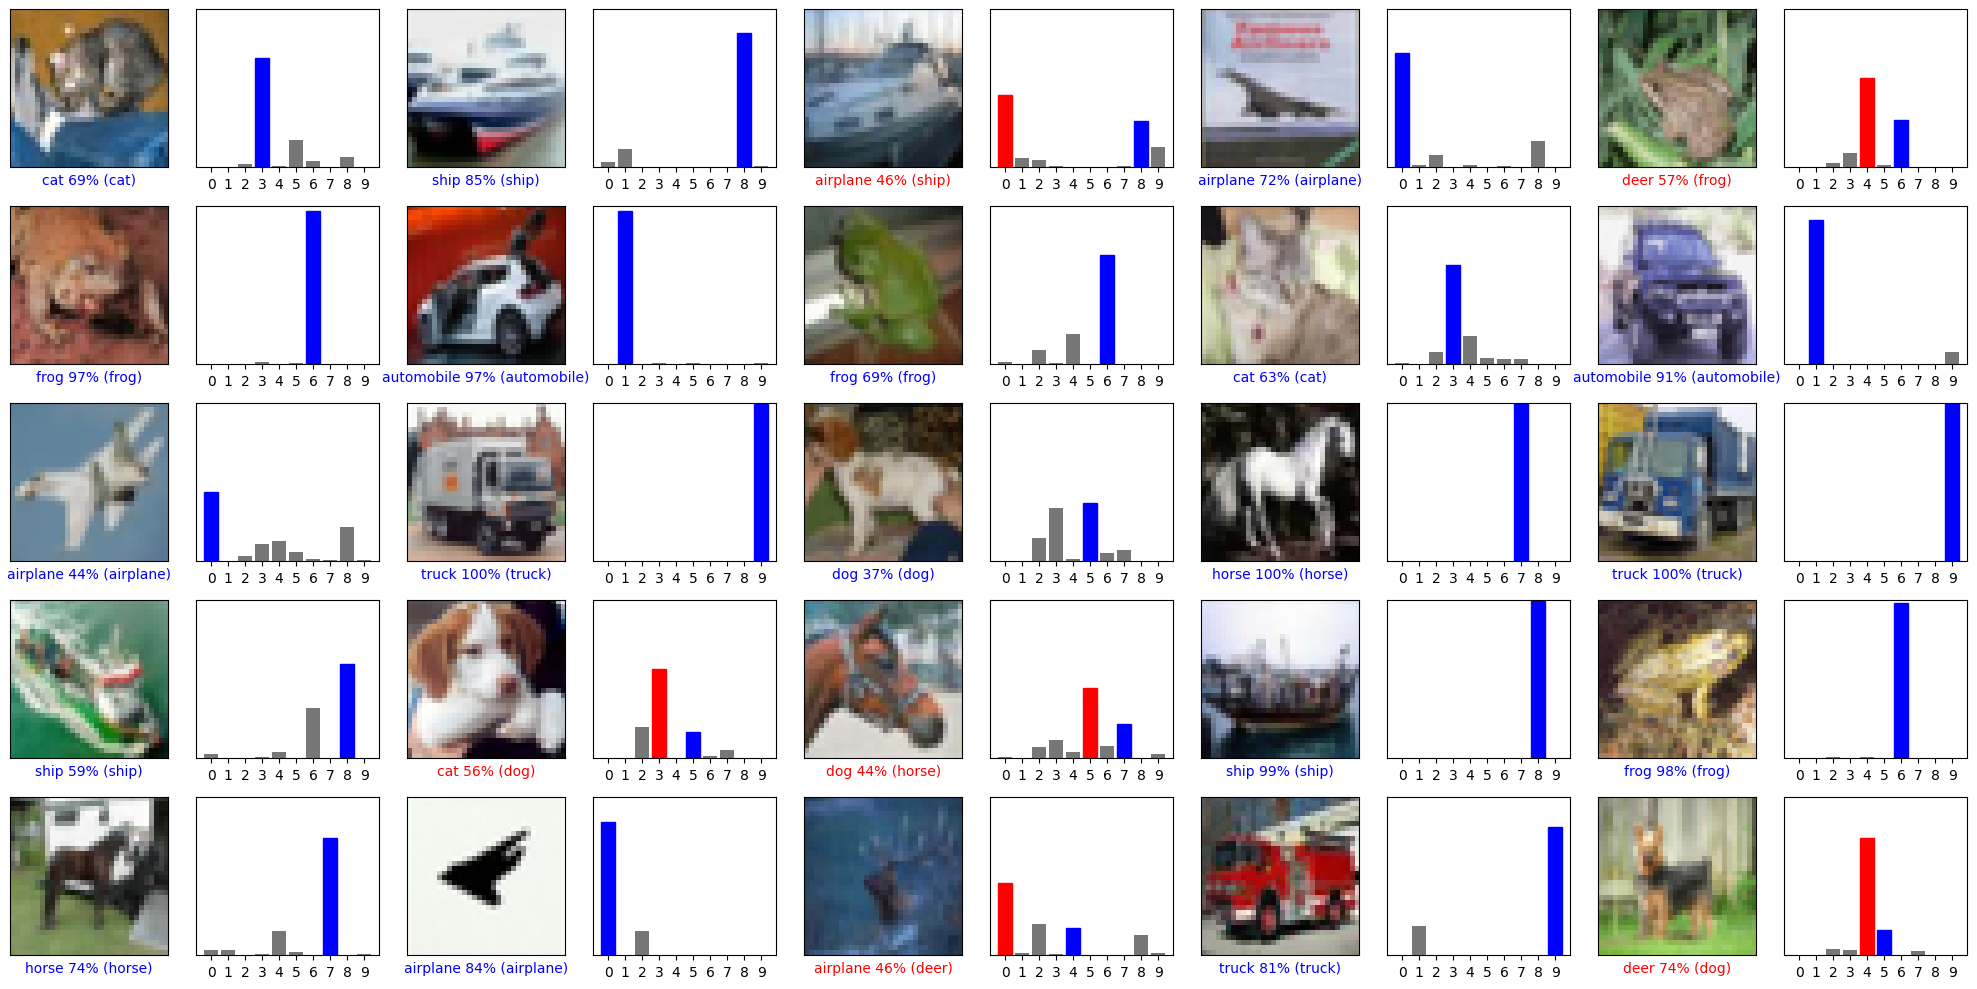

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

dapat dilihat dari hasil model prediksi tersebut, dengan indeks class (airplane,automobile,bird,cat,deer,dog,frog,horse,ship, dan truck).
Terdapat plotting first x test images, label prediksi, dan label aktual (yang ditunjukkan oleh tulisan dalam kurung). Warna biru menunjukkin prediksi yang benar dan warna merah menunjukkan prediksi yang salah.


# Try your Own

## Latihan

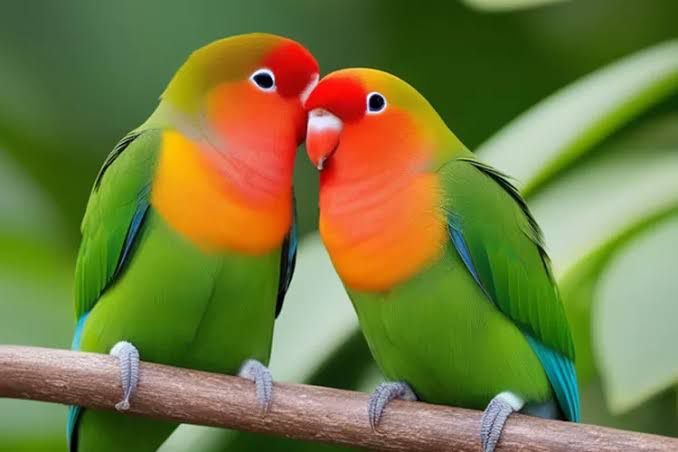

In [17]:
from PIL import Image, ImageOps

img = Image.open('/content/Latihan lagi.jpeg')
img

In [18]:
def predict(img):
  new_width  = 32
  new_height = 32
  img = np.array(img.resize((new_width, new_height)))
  img = img / 255
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.subplot(1,2,2)
  predictions_array = model.predict(img.reshape(1, 32, 32, 3))
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="blue")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.show()
  return class_names[np.argmax(model.predict(img.reshape(1, 32, 32, 3)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


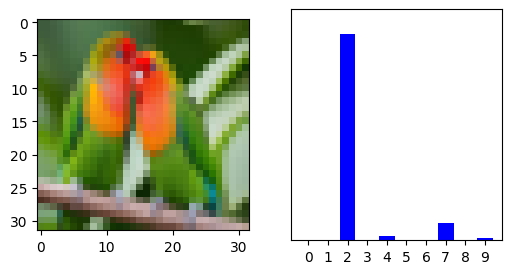

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'bird'

In [19]:
predict(img)

pada gambar disini histogram 2 terbukti  adalah gambar burung

## Tugas

ingat prediksi hanya memakai gambar ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'). Selain itu tidak bisa karena data yang tersedia hanya di atas saja

In [ ]:
# Import File
from google.colab import files
uploaded = files.upload()

In [ ]:
from PIL import Image, ImageOps

img = Image.open('/content/Latihan.jpeg')
img

In [ ]:
def predict(img):
  new_width  = 32
  new_height = 32
  img = np.array(img.resize((new_width, new_height)))
  img = img / 255
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.subplot(1,2,2)
  predictions_array = model.predict(img.reshape(1, 32, 32, 3))
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="Blue")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.show()
  return class_names[np.argmax(model.predict(img.reshape(1, 32, 32, 3)))]

In [ ]:
predict(img)